Salvatore's standard MC HDF5 file does not include information on magnet polarity. Here we derive the `MC_key` thresholds that define the magnet polarity configurations, used a method devised by Joan.

In [24]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from matplotlib import pyplot as plt
import pathlib
import joblib
from lb2jpsil import lorentz
from typing import List, Tuple

In [2]:
## Self explanatory
save_plots = False

## Toggle plot titles (off for thesis and papers, generally speaking)
show_titles = True

## Toggle plot grid
show_grid = False

## Black and white?
black_and_white = True

In [3]:
## Create plots directory, if missing
repo_directory = str(pathlib.Path.home()) + '/lambda-emdm-measurement/'

plot_directory = (
    repo_directory + 'plots/'
    + 'magnet_polarity_derivation/'
)

pathlib.Path(plot_directory).mkdir(parents=True, exist_ok=True)

In [4]:
path_to_hd5_files = str(pathlib.Path.home()) + '/data/'
input_mc = path_to_hd5_files + 'LHCbMC_2016-2017-2018_MagUpDown_Lb2JPsiL_Ttracks_v12.h5'

# Data prepping
## Import Monte Carlo data

In [5]:
def p_modulus(px, py, pz):
    return np.sqrt(px**2 + py**2 + pz**2)

def transverse_p_modulus(px, py):
    return np.sqrt(px**2 + py**2)

In [6]:
df_reco = pd.read_hdf(input_mc, key='LHCbMC_Lb')
df_truth = pd.read_hdf(input_mc, key='LHCbMCTruth_Lb')
df_mc = pd.merge(df_truth.loc[df_truth['Rec_key'] >= 0], df_reco, left_index=True, right_on='MC_key')
df_mc = df_mc.loc[(df_mc['MC_key'] >= 0) & (df_mc['Rec_key'] >= 0)]

#del(df_reco, df_truth)
del(df_reco)

In [7]:
df_mc

,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,DTF_FixJPsiLambda_PIDSubs_p_PY,DTF_FixJPsiLambda_PIDSubs_p_PZ,DTF_FixJPsiLambda_PIDSubs_mum_PX,DTF_FixJPsiLambda_PIDSubs_mum_PY,DTF_FixJPsiLambda_PIDSubs_mum_PZ,DTF_FixJPsiLambda_PIDSubs_mup_PX,DTF_FixJPsiLambda_PIDSubs_mup_PY,DTF_FixJPsiLambda_PIDSubs_mup_PZ,TrackType_y,MC_key
Rec_key,,,,,,,,,,,,,,,,,,,,,
0,0.9512,-0.1669,26.401600,343.742889,-192.429398,4751.548828,2031.640015,-1218.119995,29336.890625,445.510010,...,-186.566345,5411.963379,-804.469727,-535.944397,22858.960938,1438.071777,1619.347290,23634.302734,T,0
1,0.8237,-0.2123,3.514200,140.238602,325.837311,7463.102539,367.250000,1035.959961,24602.169922,174.279999,...,222.666214,4137.976074,-605.608093,594.454895,11170.495117,71.893692,-2873.631348,73489.484375,T,29
2,-0.4798,-0.7758,18.706800,-785.810974,-591.072998,5157.507812,-5172.310059,-3904.530029,34147.730469,-470.119995,...,-323.442810,2628.927246,4.108163,-790.314697,5651.807129,-5579.078613,-431.151581,23151.667969,T,69
3,1.6829,-2.2522,-36.520901,94.709503,-270.525391,3823.881348,5635.350098,-15984.469727,230495.453125,604.909973,...,-1702.511353,24506.517578,8712.822266,-18033.572266,231397.500000,336.531647,-3496.248779,45100.238281,T,119
5,2.2347,-3.0136,-3.515400,-41.785000,-495.398499,2890.112793,-144.789993,-1430.229980,8650.469727,-27.309999,...,-514.345398,2560.247559,2766.051025,-6544.098633,37503.421875,4405.509766,-5917.182129,27155.025391,T,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366391,0.9741,0.2091,-11.659000,294.090698,39.875000,7125.287109,2412.750000,405.109985,60216.011719,395.200012,...,-18.306223,7767.518555,1504.345581,715.472656,49351.718750,-112.221489,2933.706299,37641.914062,T,8921673
366392,-0.5103,1.2180,21.928400,-148.940399,123.715599,7319.557129,-1238.500000,978.909973,57653.351562,-45.599998,...,-50.586430,-2812.631592,-3547.666504,1885.741577,33505.289062,-1337.816284,1466.083374,45027.328125,T,8921702
366393,0.1275,-0.0589,25.113001,-123.851601,-28.034100,2985.664307,-6471.830078,-1487.530029,153226.906250,-561.440002,...,-133.646973,15975.192383,-3526.683594,-343.335175,44636.988281,-3534.635254,-3121.734619,91762.195312,T,8921772


In [8]:
only_lambda = df_mc['MCTRUTH_L_ID'] == 3122

# Find the magnet polarity thresholds

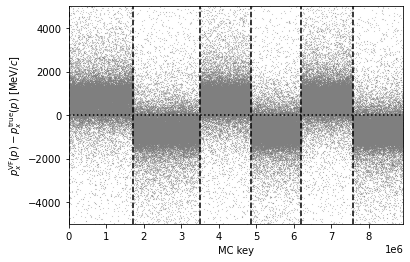

In [9]:
plt.scatter(
    df_mc['MC_key'].loc[only_lambda],
    (df_mc['p_PX'] - df_mc['MCTRUTH_p_PX']).loc[only_lambda],
    marker='x',
    s=0.01,
    color='tab:gray'
)

plt.xlabel("MC key")
plt.ylabel(r"$p_x^\mathrm{VF}(p) - p_x^\mathrm{true}(p)$ [MeV/$c$]")

for i in [0,1.73e6,3.5e6,4.86e6,6.2e6,7.57e6,10e6]:
    plt.axvline(i, linestyle='--', color='k')

plt.axhline(0, linestyle='dotted', color='k')
    
plt.xlim((0, df_mc['MC_key'].max()))
plt.ylim((-5000,5000))

plt.show()

In [10]:
polarity_borders = [int(n) for n in [0,1.73e6,3.5e6,4.86e6,6.2e6,7.57e6,10e6]]

In [37]:
mag_down_bins = [(0, 1730000), (3500000, 4860000), (6200000, 7570000)]
mag_up_bins =  [(1730000, 3500000), (4860000, 6200000), (7570000, 10000000)]

for mag_bin in mag_up_bins:
    df_mc.loc[(df_mc['MC_key'] >= mag_bin[0]) & (df_mc['MC_key'] < mag_bin[1]), 'Polarity'] = +1
    
for mag_bin in mag_down_bins:
    df_mc.loc[(df_mc['MC_key'] >= mag_bin[0]) & (df_mc['MC_key'] < mag_bin[1]), 'Polarity'] = -1

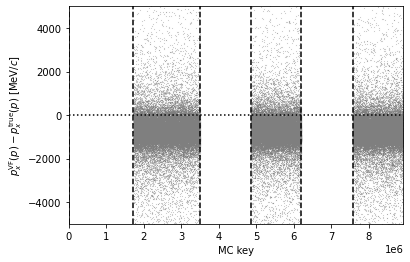

In [39]:
plt.scatter(
    df_mc['MC_key'].loc[only_lambda & (df_mc['Polarity'] == +1)],
    (df_mc['p_PX'] - df_mc['MCTRUTH_p_PX']).loc[only_lambda & (df_mc['Polarity'] == +1)],
    marker='x',
    s=0.01,
    color='tab:gray'
)

plt.xlabel("MC key")
plt.ylabel(r"$p_x^\mathrm{VF}(p) - p_x^\mathrm{true}(p)$ [MeV/$c$]")

for i in [0,1.73e6,3.5e6,4.86e6,6.2e6,7.57e6,10e6]:
    plt.axvline(i, linestyle='--', color='k')

plt.axhline(0, linestyle='dotted', color='k')
    
plt.xlim((0, df_mc['MC_key'].max()))
plt.ylim((-5000,5000))

plt.show()

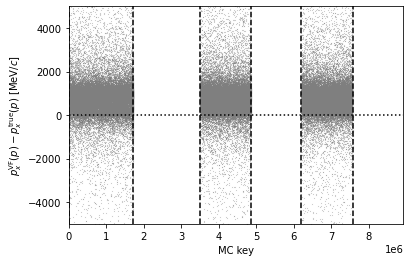

In [40]:
plt.scatter(
    df_mc['MC_key'].loc[only_lambda & (df_mc['Polarity'] == -1)],
    (df_mc['p_PX'] - df_mc['MCTRUTH_p_PX']).loc[only_lambda & (df_mc['Polarity'] == -1)],
    marker='x',
    s=0.01,
    color='tab:gray'
)

plt.xlabel("MC key")
plt.ylabel(r"$p_x^\mathrm{VF}(p) - p_x^\mathrm{true}(p)$ [MeV/$c$]")

for i in [0,1.73e6,3.5e6,4.86e6,6.2e6,7.57e6,10e6]:
    plt.axvline(i, linestyle='--', color='k')

plt.axhline(0, linestyle='dotted', color='k')
    
plt.xlim((0, df_mc['MC_key'].max()))
plt.ylim((-5000,5000))

plt.show()

# Check: horizontality study

In [41]:
def row_a_vec(row, p_pvec_column, pim_pvec_column):
    return np.cross(row[p_pvec_column], row[pim_pvec_column])

In [42]:
def row_a_norm(row, avec_column):
    return np.linalg.norm(row[avec_column])

In [43]:
def feature_component(series, component):
    return series.map(lambda x: x[component])

In [44]:
## This computes (once) a new column in df named 'momenta_prefix_h',
## containing the related horizontality. Returns the related column name.
def compute_horizontality(
    df: pd.DataFrame,
    momenta_prefix: str,
    p_px_column: str,
    p_py_column: str,
    p_pz_column: str,
    pim_px_column: str,
    pim_py_column: str,
    pim_pz_column :str,
):
      
    p_pvec_column = momenta_prefix + "_p_p_vec"
    pim_pvec_column = momenta_prefix + "_pim_p_vec"
    avec_column = momenta_prefix + "_a_vec"
    anorm_column = momenta_prefix + "_a_norm"
    ahat_column = momenta_prefix + "_a_hat"
    h_column = momenta_prefix + "_h"
    
    df[p_pvec_column] = list(zip(df[p_px_column], df[p_py_column], df[p_pz_column]))
    df[pim_pvec_column] = list(zip(df[pim_px_column], df[pim_py_column], df[pim_pz_column]))
    df[avec_column] = df.apply(lambda row: row_a_vec(row, p_pvec_column, pim_pvec_column), axis=1)
    df[anorm_column] = df.apply(lambda row: row_a_norm(row, avec_column), axis=1)
    df[ahat_column] = df[avec_column]/df[anorm_column]
    df[h_column] = feature_component(df[ahat_column], 1) * df['Polarity'] * np.sign(df['L_ID'])
    
    df.drop(columns=[
        p_pvec_column,
        pim_pvec_column,
        avec_column,
        anorm_column,
        ahat_column
    ], inplace=True)
    
    return h_column

In [45]:
h_reco_DTF = compute_horizontality(
    df=df_mc, momenta_prefix="DTF_FixJPsiLambda",
    p_px_column='DTF_FixJPsiLambda_p_PX', p_py_column='DTF_FixJPsiLambda_p_PY', p_pz_column='DTF_FixJPsiLambda_p_PZ',
    pim_px_column='DTF_FixJPsiLambda_pim_PX', pim_py_column='DTF_FixJPsiLambda_pim_PY', pim_pz_column='DTF_FixJPsiLambda_pim_PZ'
)

In [46]:
h_truth = compute_horizontality(
    df=df_mc, momenta_prefix="MCTRUTH",
    p_px_column='MCTRUTH_p_PX', p_py_column='MCTRUTH_p_PY', p_pz_column='MCTRUTH_p_PZ',
    pim_px_column='MCTRUTH_pim_PX', pim_py_column='MCTRUTH_pim_PY', pim_pz_column='MCTRUTH_pim_PZ'
)

In [49]:
def plot_series_histogram(
    series: pd.Series,
    binning: int,
    x_range: Tuple[float],
    title: str,
    x_label: str,
    file_name: str,
    zero_vline: bool = False,
    log_scale: bool = False,
    show_title: bool = True,
    show_grid: bool = True,
    black_and_white: bool = False,
    scientific_notation: bool = False,
) -> None:

    ## Common plot parameters
    common_plot_params = {
        'range': x_range,
        'bins': binning,
    }
    
    ## With color or b&w?
    if black_and_white:
        common_plot_params['histtype'] = 'stepfilled'
        common_plot_params['edgecolor'] = 'black'
        common_plot_params['color'] = 'gainsboro' 
        common_plot_params['hatch'] = '//' 
    else:
        common_plot_params['color'] = 'goldenrod'
        
    ## With pre-selection cuts
    plt.hist(series, **common_plot_params)
    
    if zero_vline:
        plt.axvline(0, 0, 100, color='black', linestyle='--')
    
    if log_scale:
        plt.yscale('log')
    
    if show_grid:
        plt.grid()
        
    if scientific_notation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    
    plt.xlabel(x_label)
    plt.ylabel("Events")
        
    if show_title:
        plt.title(title + '\n(MC simulation)')
    
    if save_plots:
        plt.savefig(plot_directory + file_name + '.pdf', bbox_inches = 'tight')

    plt.show()

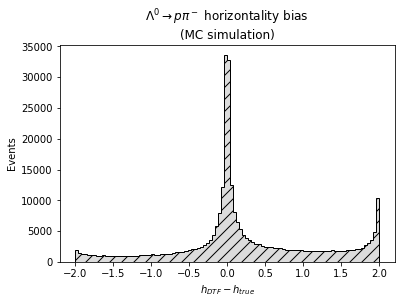

In [50]:
plot_parameters = {
    'binning': 100,
    'x_range': (-2, 2),
    'title': r'$\Lambda^0 \rightarrow p\pi^-$ horizontality bias',
    'x_label': '$h_{DTF} - h_{true}$',
    'file_name': 'Lambda_horizontality_bias',
    'zero_vline': False,
    'log_scale': False,
    'show_title': show_titles,
    'black_and_white': black_and_white,
    'show_grid': show_grid,
}

plot_series_histogram(
    df_mc[h_reco_DTF] - df_mc[h_truth],
    **plot_parameters)

In [52]:
upside_down_individual_cut = df_mc[h_reco_DTF] - df_mc[h_truth] > 1
downside_up_individual_cut = df_mc[h_reco_DTF] - df_mc[h_truth] < -1

In [53]:
len(df_mc[upside_down_individual_cut]) / len(df_mc)

0.20168477200286217

In [54]:
len(df_mc[downside_up_individual_cut]) / len(df_mc)

0.09055486892603916

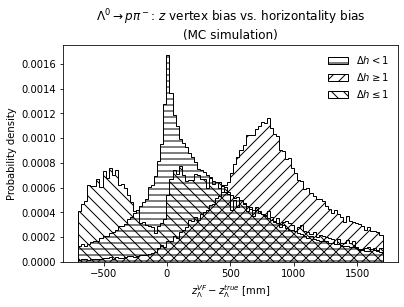

In [56]:
## Common plot parameters
common_plot_params = {
    'range': (-700,1700),
    'bins': 100,
    'histtype': 'stepfilled',
    'edgecolor': 'black',
    'facecolor': 'none',
    'density': True
}

## Individual plot parameters
right_way_up_params = {
    'hatch': '--',
    'label': '$\Delta h < 1$'
}

upside_down_params = {
    'hatch': '//',
    'label': '$\Delta h \geq 1$'
}

downside_up_params = {
    'hatch': '\\\\',
    'label': '$\Delta h \leq 1$'
}

series = df_mc['L_ENDVERTEX_Z'] - df_mc['MCTRUTH_L_ENDVERTEX_Z']

## Bias -1 < x < 1
plt.hist(series.loc[~upside_down_individual_cut & ~downside_up_individual_cut], **common_plot_params, **right_way_up_params)

## Bias >= 1
plt.hist(series.loc[upside_down_individual_cut & ~downside_up_individual_cut], **common_plot_params, **upside_down_params)

## Bias <= 1
plt.hist(series.loc[~upside_down_individual_cut & downside_up_individual_cut], **common_plot_params, **downside_up_params)

if show_grid:
    plt.grid()

plt.xlabel('$z_\Lambda^{VF} - z_\Lambda^{true}$ [mm]',)
plt.ylabel("Probability density")

if show_titles:
    plt.title(r'$\Lambda^0 \rightarrow p\pi^-$: $z$ vertex bias vs. horizontality bias' + '\n(MC simulation)')

plt.legend(frameon=False)
    
if save_plots:
    plt.savefig(plot_directory + 'lambda_endvertex_z_bias_vs_horizontality_bias' + '.pdf', bbox_inches = 'tight')

plt.show()